In [1]:
from PIL import Image
import os, glob, sys
import numpy as np
from sklearn.model_selection import train_test_split # 섞어줌
from keras.utils import np_utils

In [2]:
# 모델 구성

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
img_dir = '/content/drive/MyDrive/git/raw-img'
categories = ['chicken','cat','dog','cow']
np_classes = len(categories)

image_w = 100
image_h = 100

pixel = image_h * image_w * 3

X=[]
y=[]

for idx, messy_desk in enumerate(categories) : ## 인덱스 값과 벨류 값이 같이나옴 enumerate

    img_dir_detail = img_dir + "/" + messy_desk
    files = glob.glob(img_dir_detail + "/*") ## 파일들이 리스트 형태로 저장된다.

    for i, f in enumerate(files) :
        try :
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            # Y는 0 아니면 1 이므로 idx 값으로 넣는다.
            X.append(data)
            y.append(idx)
            if i % 300 == 0 :
                print(messy_desk, ":", f)
      
        except :
            print(messy_desk, str(i) + " 번째에서 에러", f)

X = np.array(X)
y = np.array(y)

chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP-nCvGaJ7AImbmYsDfVLED5gHaFj.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP-R5Mz_a0OvutTBux-Cr0jMwHaFE.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP-v1Gm2fW6vU2nmNtZAaCd_QHaFj.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP--ysTUSbhCFBjrIdKdu2PpAAAAA.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP-Dl-Mf2l17ZXDJMDLLRe5fwHaHc.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP-H_sH69SauLfZ7TKWAQfNuQHaFl.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP-kt8VrthA0UPAleJ-2QMZvQHaFj.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/257.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/909.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/OIP-55J4CT1nEh3tMehZkQmqLwHaFj.jpeg
chicken : /content/drive/MyDrive/git/raw-img/chicken/10.jpeg
cat : /content/drive/MyDrive/git/raw-img/cat/1880.jpeg
cat : /content/drive/MyDrive/git/raw-img/cat/6.j

In [6]:
## train set 0.9, test set 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

## 전처리 된 파일을 저장한다 : check point 1
xy = (X_train, X_test, y_train, y_test)
np.save('/content/drive/MyDrive/git/4_categorical_100.npy', xy)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/git/4_categorical_100.npy', allow_pickle=True)

# 정규화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

(9095, 100, 100, 3)
9095
[2750 1484 3175 1686]
[348 184 299 180]


In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape = X_train.shape[1:], activation="relu"))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [10]:
model_dir = '/content/drive/MyDrive/git/model'
if not os.path.exists(model_dir) :
  os.mkdir(model_dir)
model_path = model_dir + "/4_cnn_100.model"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, callbacks=[checkpoint, early_stopping], batch_size=50, validation_data = (X_test,y_test), epochs = 100)

Epoch 1/100
182/182 [==============================] - ETA: 0s - loss: 1.2371 - accuracy: 0.4100
Epoch 00001: val_loss improved from inf to 1.15810, saving model to /content/drive/MyDrive/git/model/4_cnn_100.model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/git/model/4_cnn_100.model/assets
182/182 [==============================] - 16s 42ms/step - loss: 1.2371 - accuracy: 0.4100 - val_loss: 1.1581 - val_accuracy: 0.4461
Epoch 2/100
180/182 [============================>.] - ETA: 0s - loss: 1.0776 - accuracy: 0.5071
Epoch 00002: val_loss improved from 1.15810 to 1.01139, saving model to /content/drive/MyDrive/git/model/4_cnn_100.model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/git/model/4_cnn_100.model/assets
182/182 [==============================] - 6s 34ms/step - loss: 1.0765 - accuracy: 0.5084 - val_loss: 1.0114 - val_accuracy: 0.5569
Epoch 3/100
181/182 [============================>.] - ETA: 0s - loss: 0.8959 - accuracy: 0.6244
Epoch 00003: val_loss im

<Figure size 432x288 with 0 Axes>

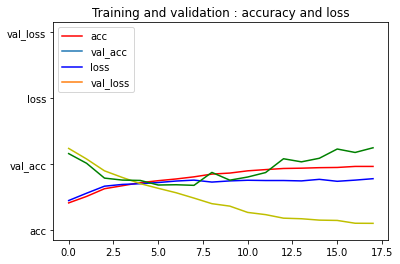

<Figure size 432x288 with 0 Axes>

In [14]:
# 정확도와 loss 차트 그리기
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# history의 train과 test의 정확도와 loss를 각각 가져온다.
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # 에포크

# 그래프로 표시
plt.plot(epochs, acc, 'r', "acc")
plt.plot(epochs, val_acc, 'b', "val_acc")
plt.plot(epochs, loss, 'y', "loss")
plt.plot(epochs, val_loss, 'g', "val_loss")
plt.legend(['acc','val_acc','loss','val_loss'], loc = 'upper left')

plt.title('Training and validation : accuracy and loss')
plt.figure()


